In [318]:
##importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
# machine learnig
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [247]:
data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [21]:
data.shape

(1025, 14)

In [22]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [96]:
data = data.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'resting_electrocardiogram', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")

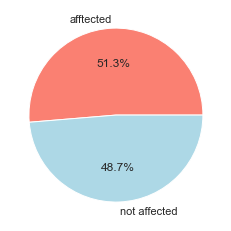

<AxesSubplot:>

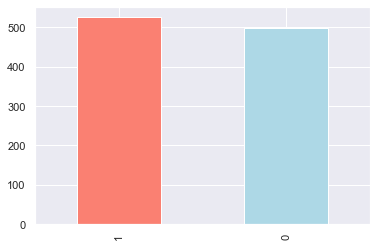

In [115]:
sns.set(font_scale=1)
colors = ['salmon', 'lightblue','green']
mylabels = ["afftected", "not affected", ]
plt.pie(data.target.value_counts().values , labels=mylabels,autopct='%1.1f%%',colors =colors)
plt.show()
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

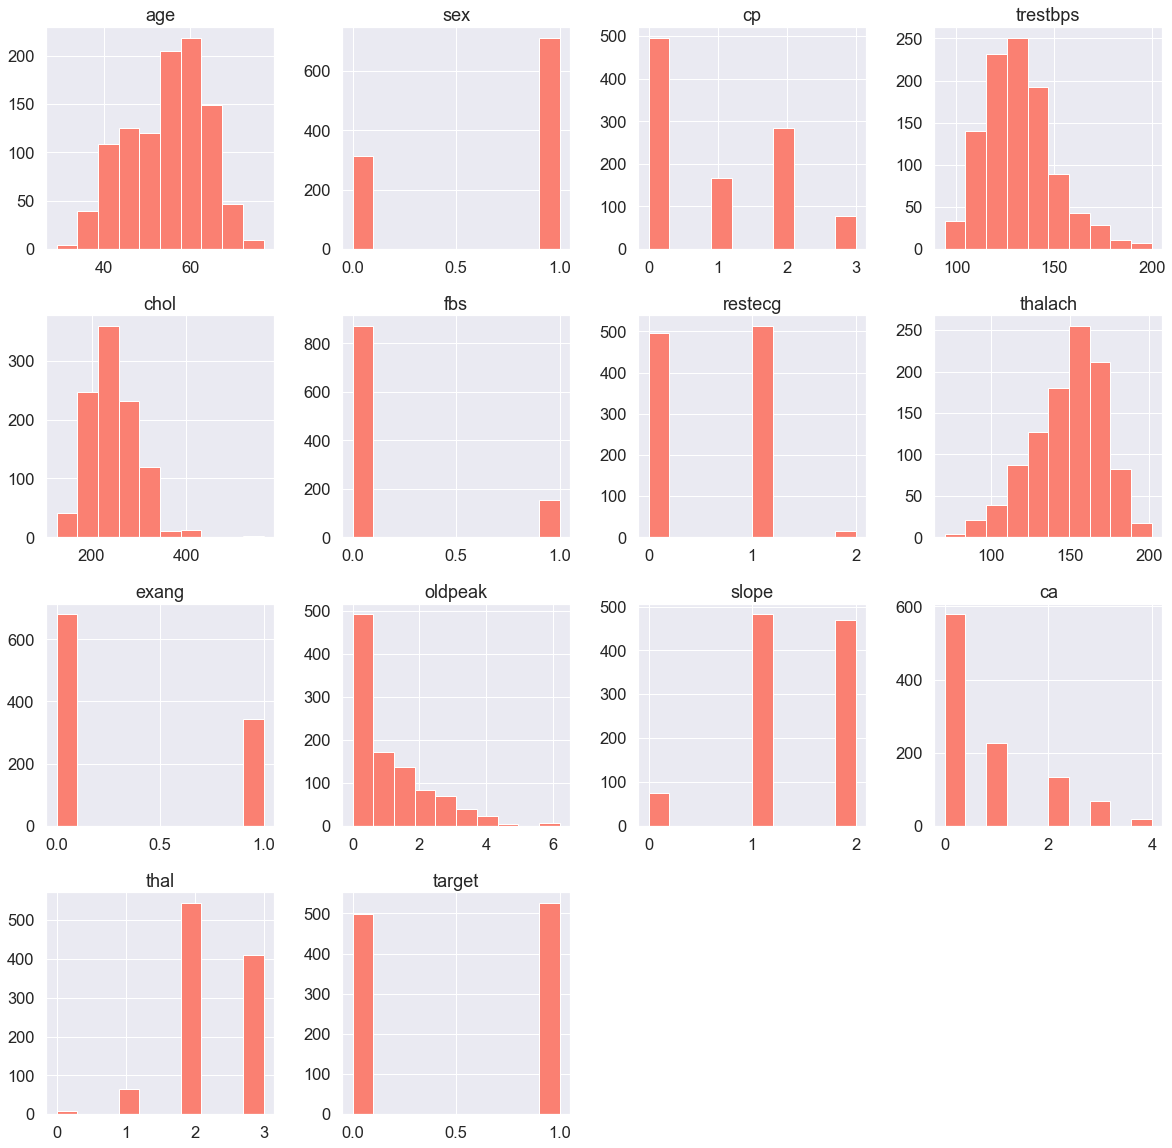

In [190]:
sns.set(font_scale=1.5)
data.hist(figsize=(20,20),color='salmon')
plt.show()

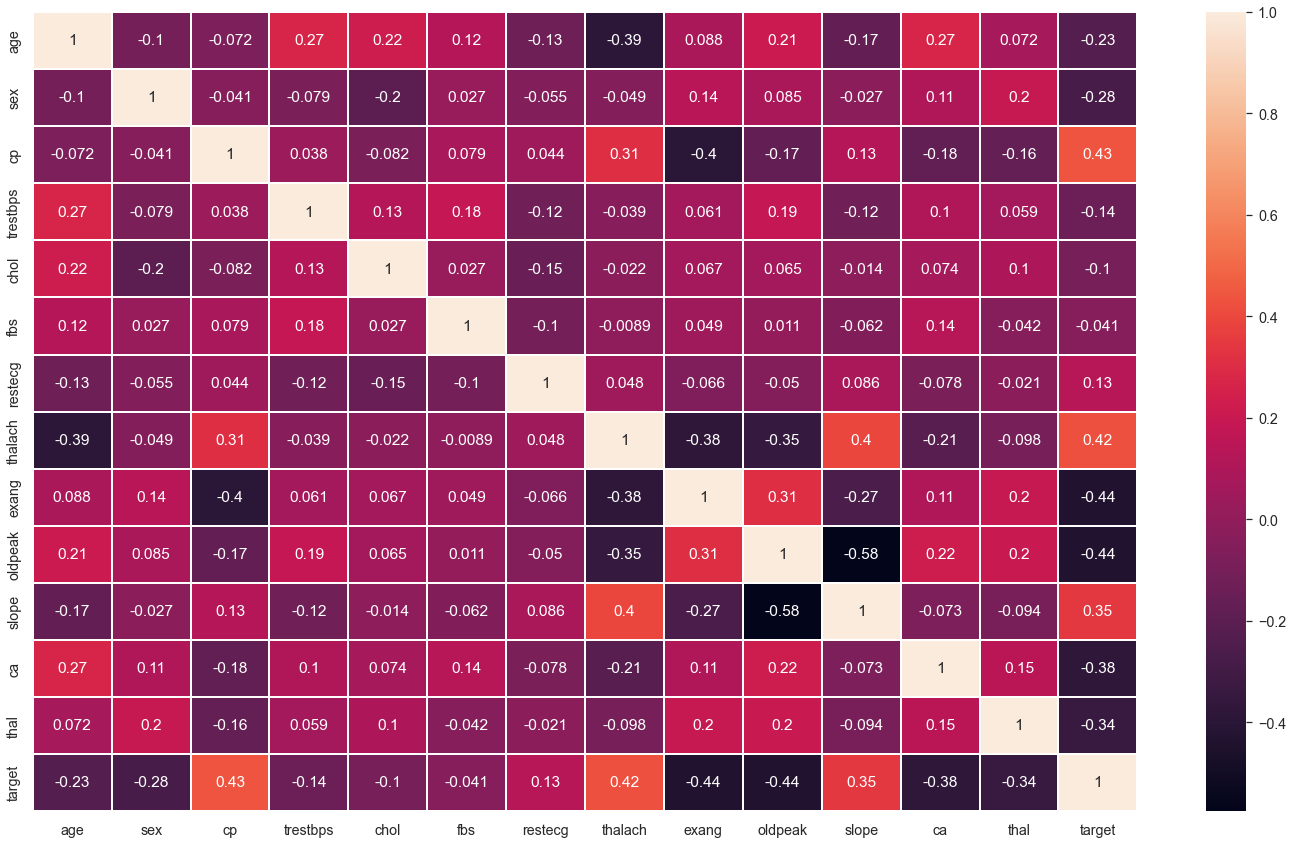

In [189]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

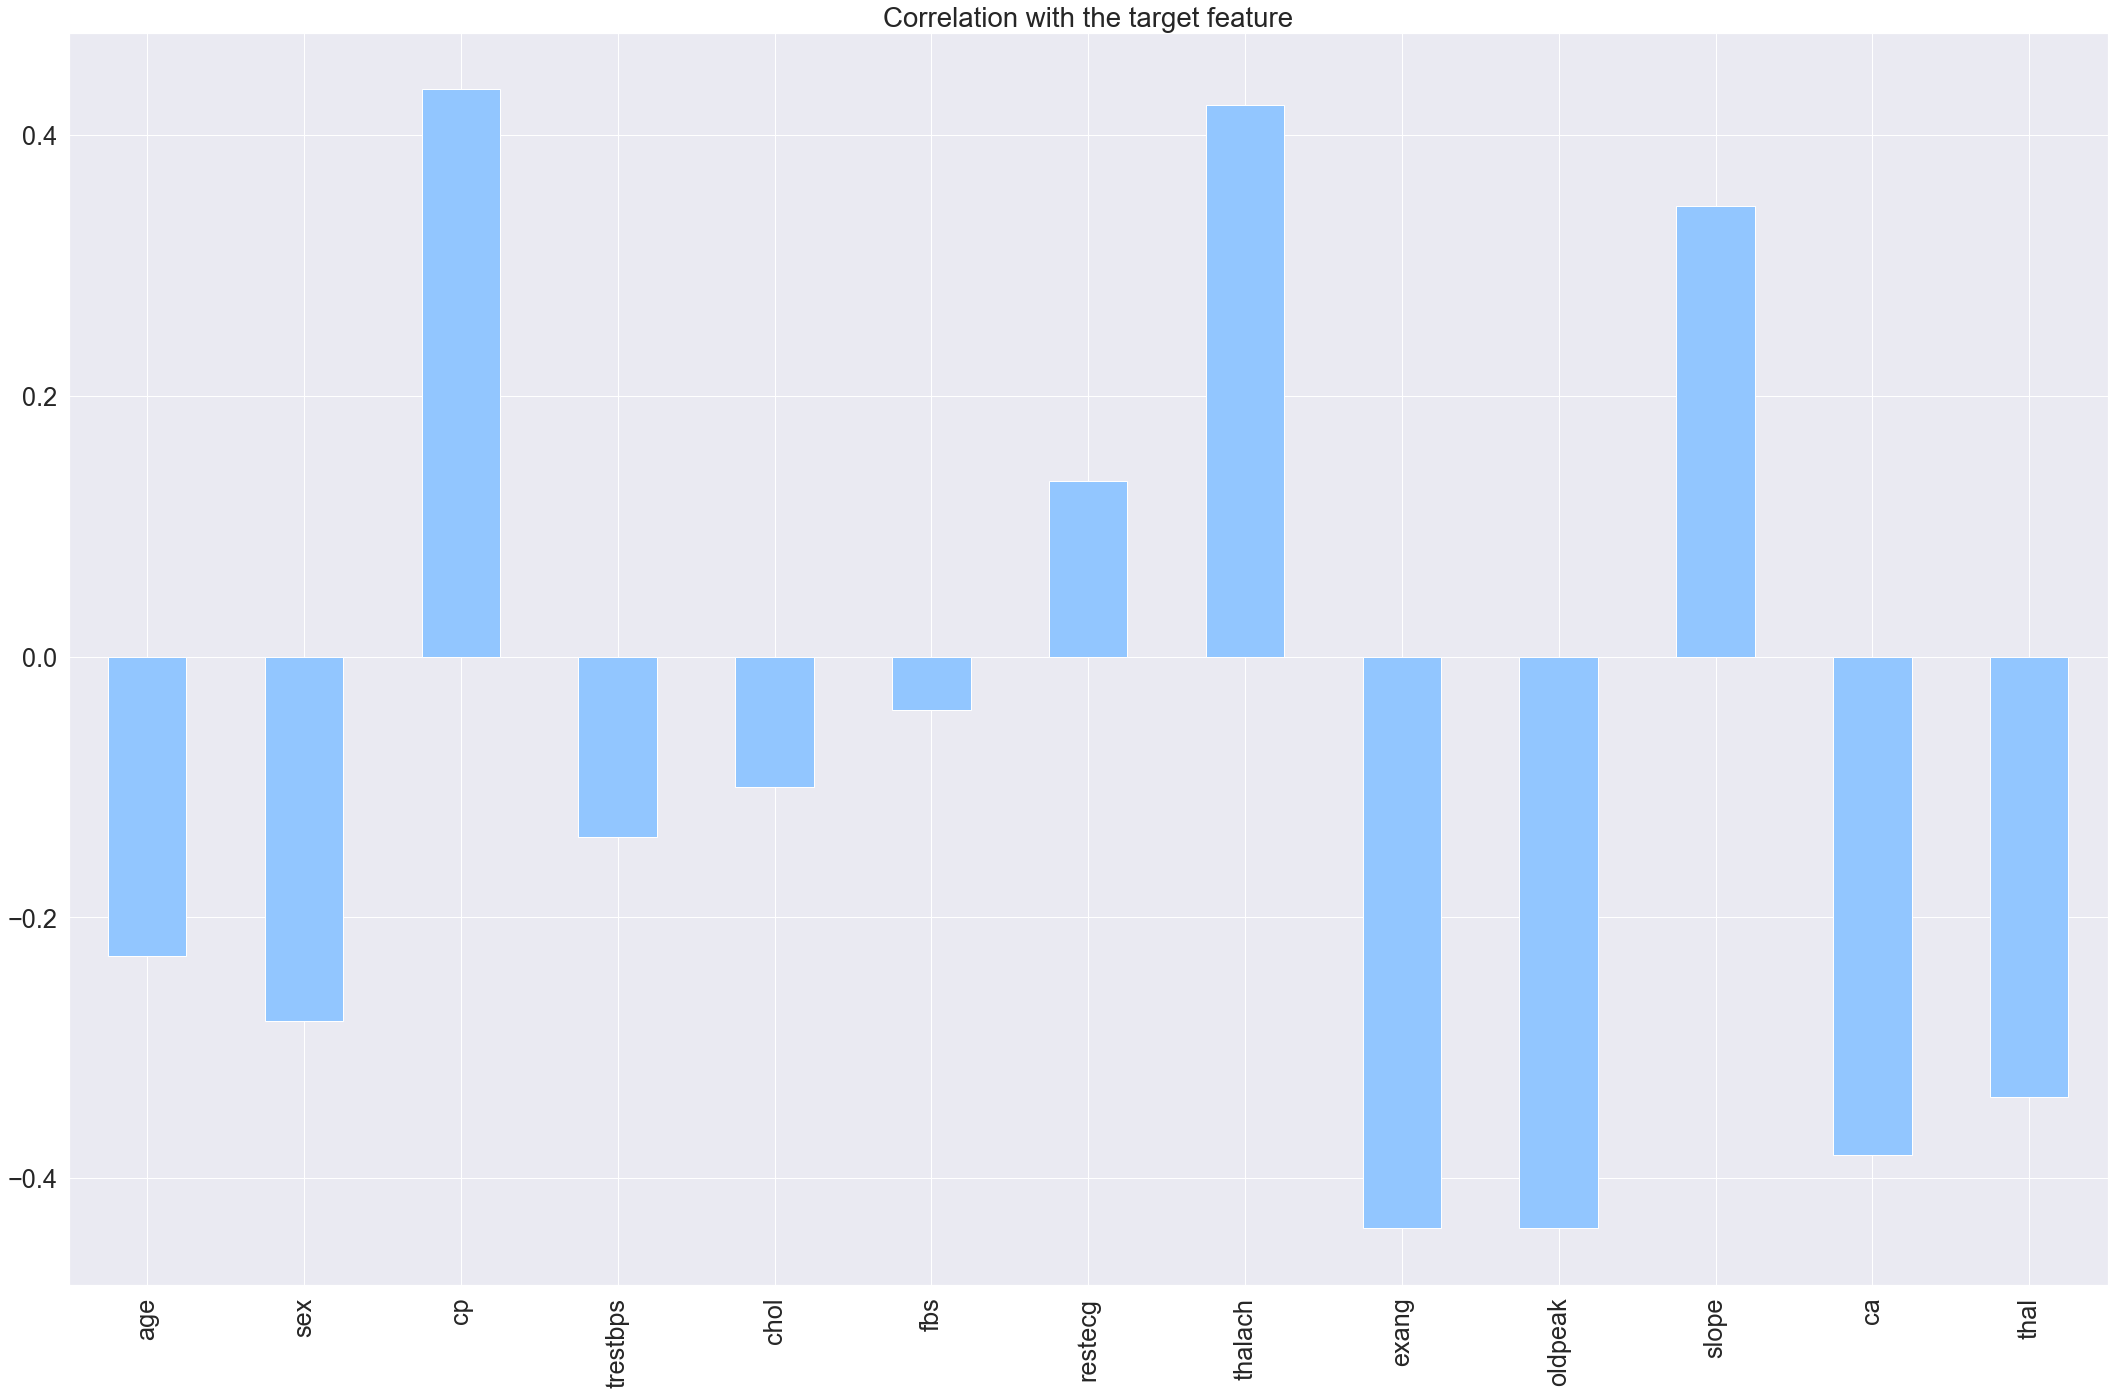

In [188]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(30, 20), title="Correlation with the target feature")
plt.tight_layout()


Correlation lie between -4 to +4 which means there is weak positive and negative realtion among variables.

Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.

Other features are negatively correlated with the target feature.

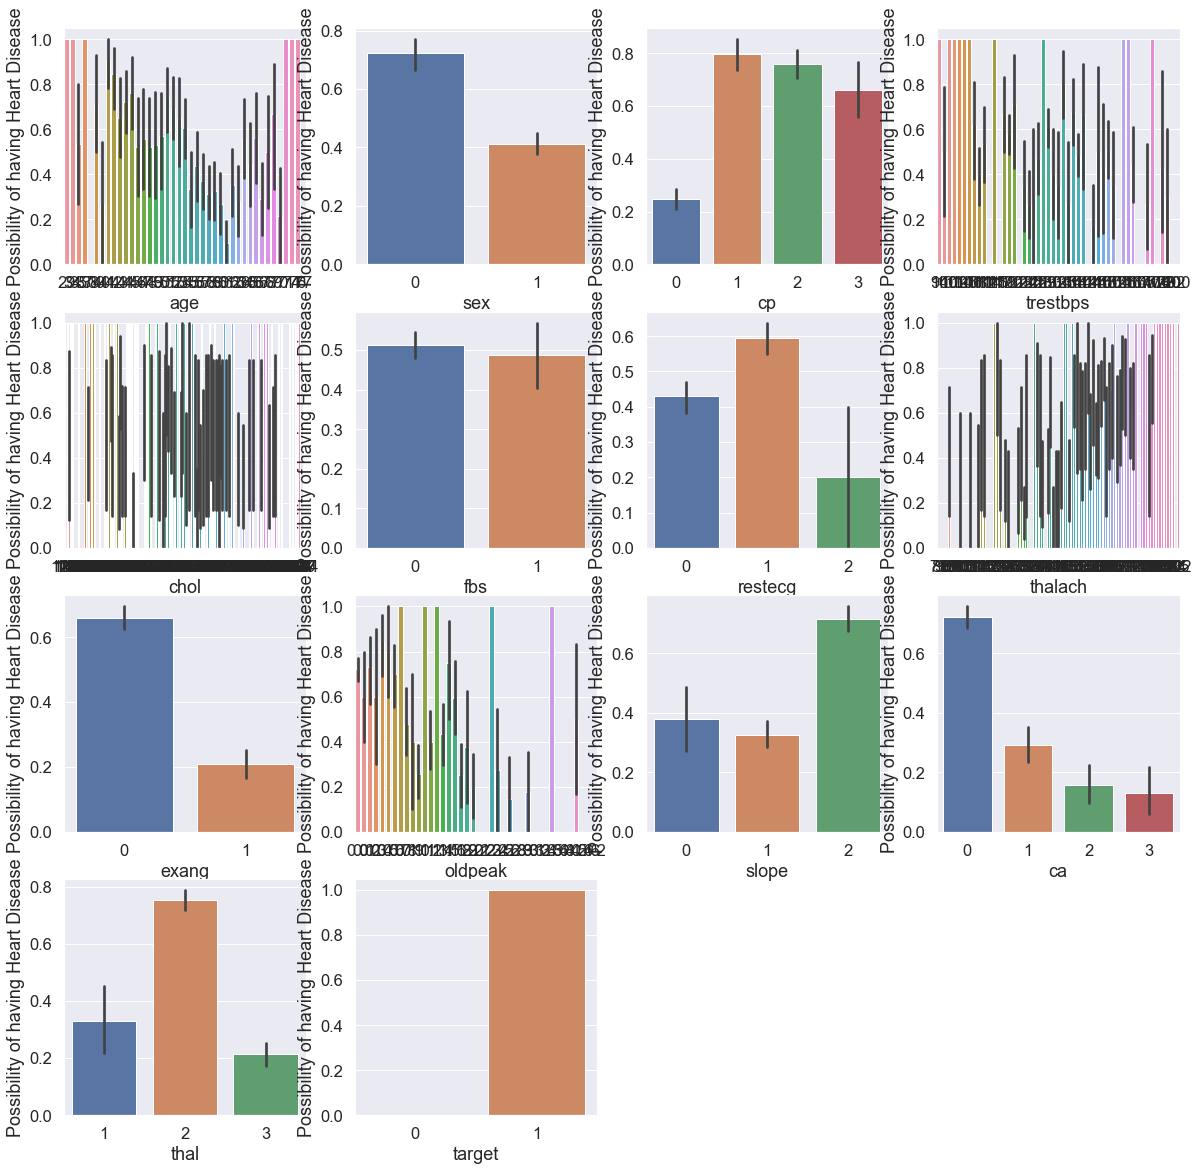

In [360]:
sns.set(font_scale=1.5)
categorical_values = list(data.columns)
plt.figure(figsize=(20,20))

for i, col in enumerate(categorical_values, 1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}",y='target', data=data)
    plt.ylabel("Possibility of having Heart Disease")
    plt.xlabel(f"{col}")

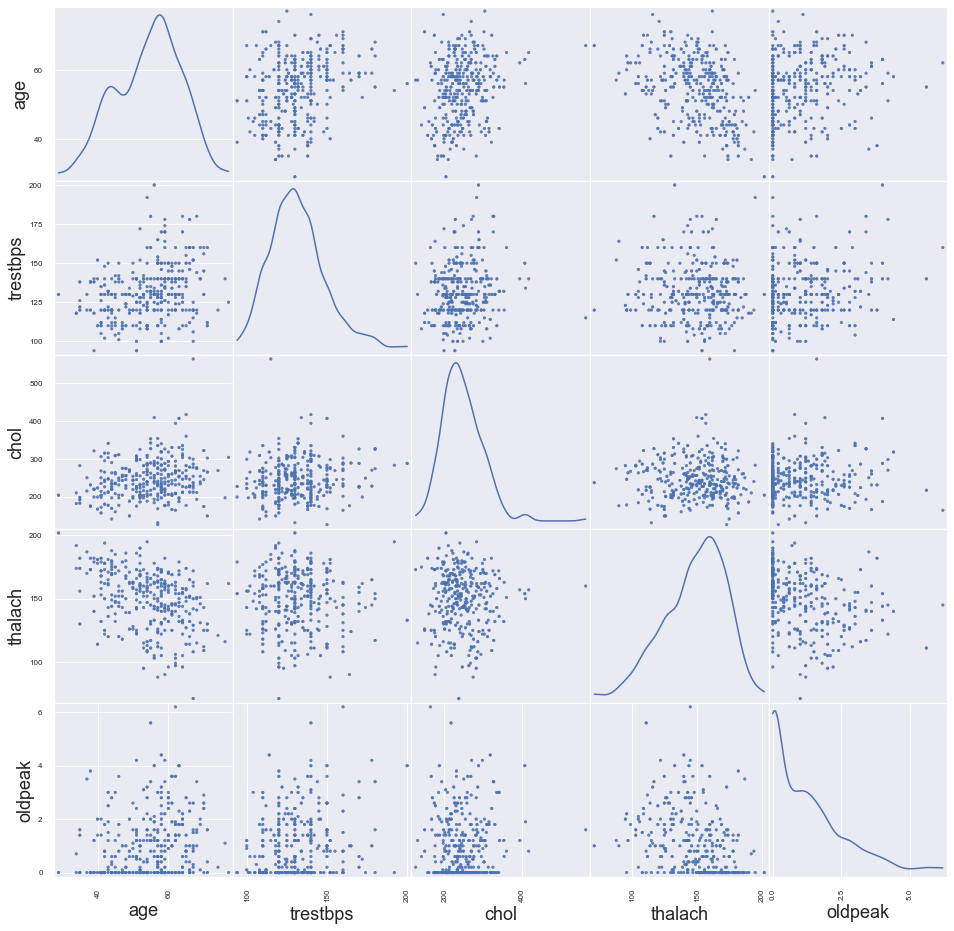

In [194]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
scatter_matrix(data[numerical_features], figsize=(16, 16), diagonal='kde')
plt.show()

[None, None, None, None, None]

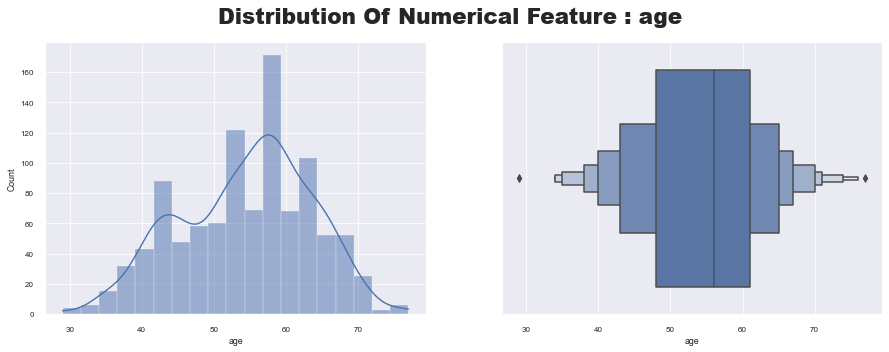

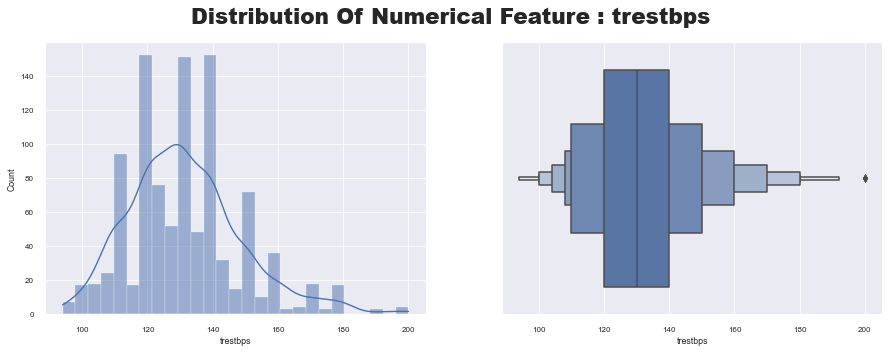

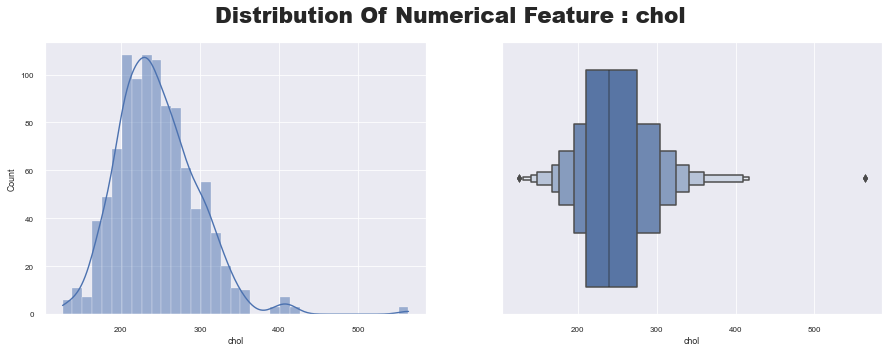

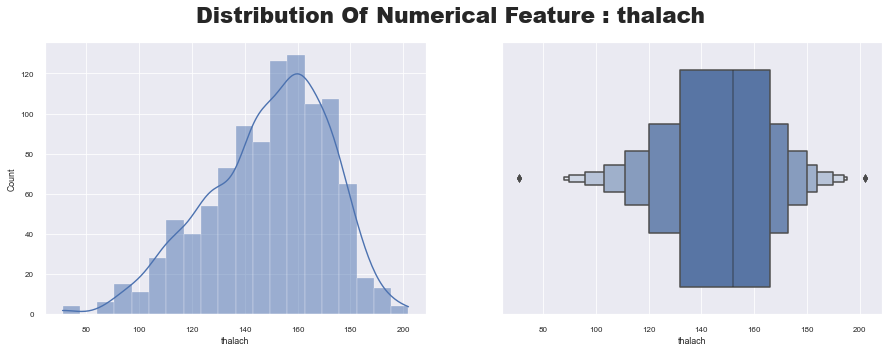

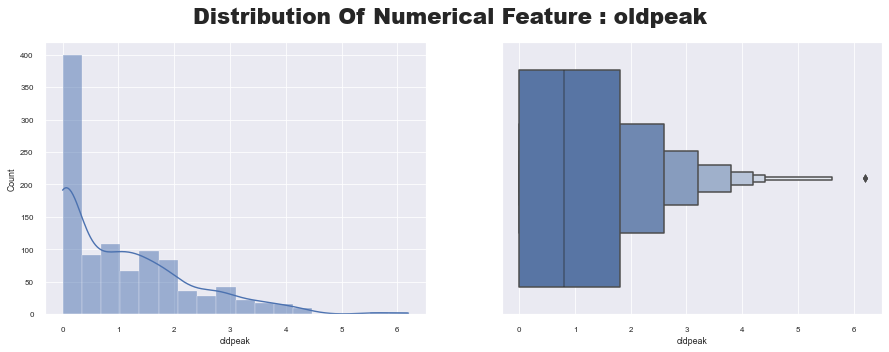

In [202]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']

def plot_numerical_dist(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('Distribution Of Numerical Feature : {}'.format(f_name) , fontweight='heavy')
    plt.style.use('seaborn-paper')
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=f_name , kde=True)
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=data , x=f_name,linewidth=1.5)
list(map(plot_numerical_dist,numerical_features))

<AxesSubplot:xlabel='age', ylabel='count'>

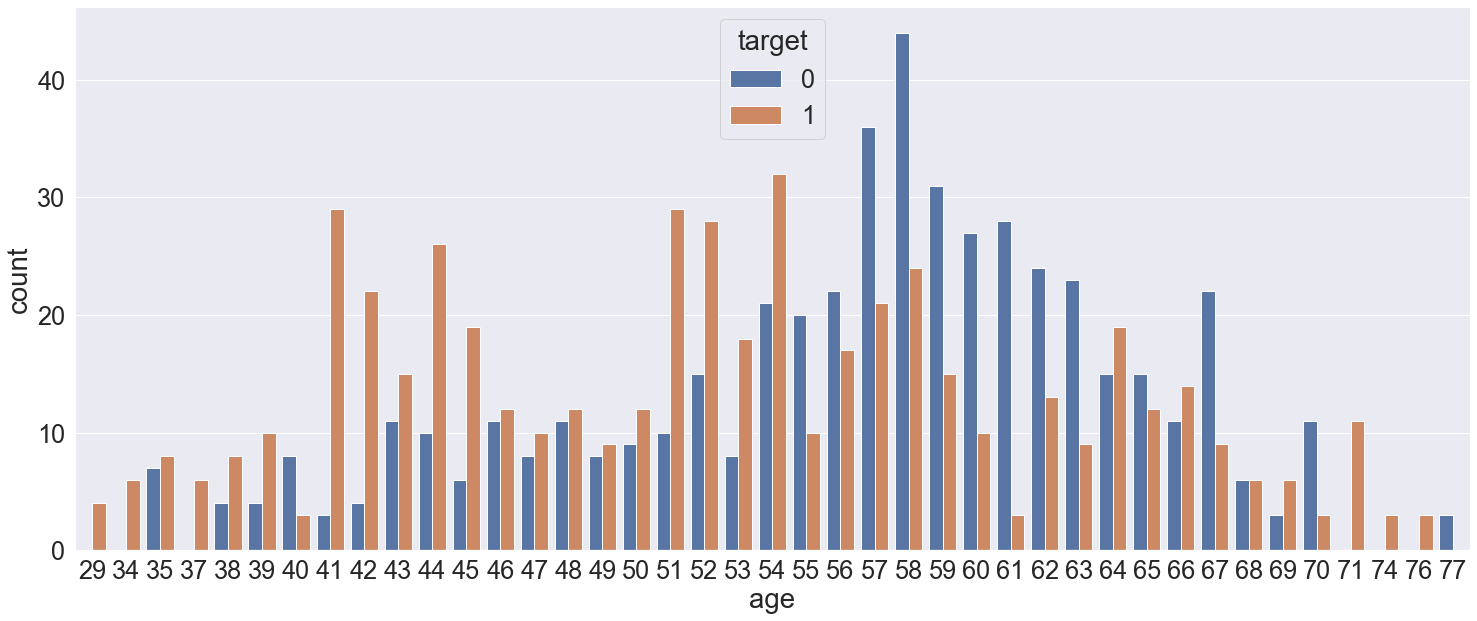

In [83]:
plt.figure(figsize=(25,10))
sns.countplot(x='age', hue='target', data=data)

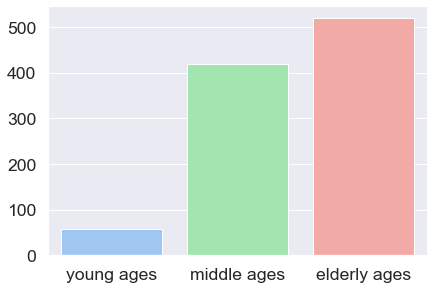

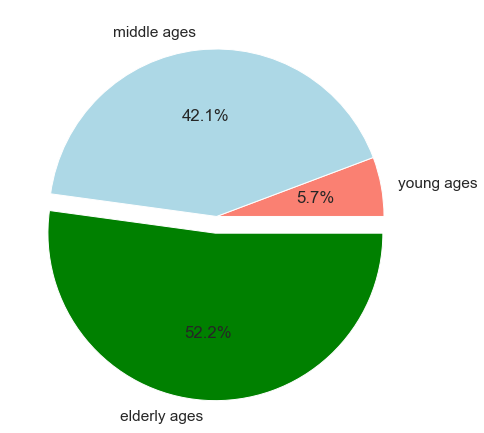

In [181]:

labels=['young ages','middle ages','elderly ages']
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]


sns.barplot(x=labels,y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

explode = [0,0,0.1]
plt.figure(figsize=(7,7))
sns.set_context('notebook',font_scale = 1.4)
plt.pie([len(Young),len(Middle),len(Elder)],labels=labels,explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

 #### we can see that elder people are the most affected by heart disease and young ones are the least affected.

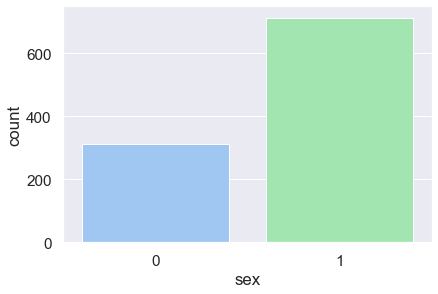

In [182]:

sns.countplot(data['sex'])
plt.tight_layout()

#### Ratio of Male to Female is approx 2:1.

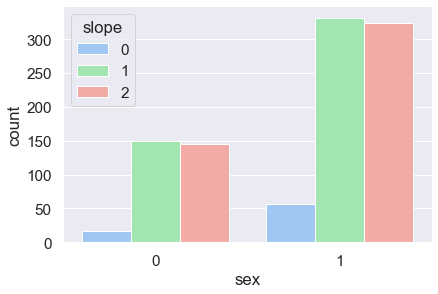

In [183]:

sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

#### it is clearly visible that the slope value is higher in the case of males(1).

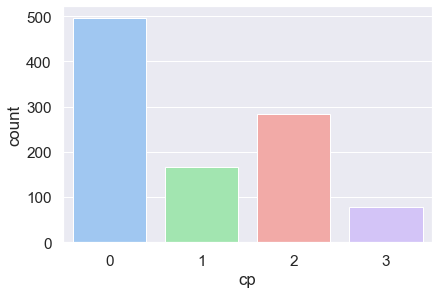

In [184]:
cpLabel=['typical angina', 'atypical angina','non-anginal pain','asymptomatic']
sns.countplot(data['cp'])
plt.tight_layout()

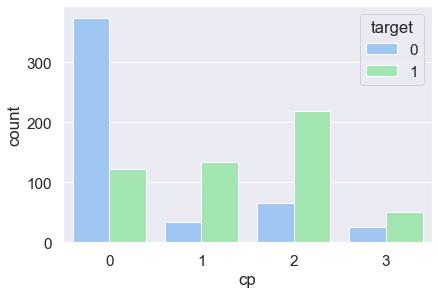

In [185]:

sns.countplot(data['cp'],hue=data["target"])
plt.tight_layout()

#### People having the least chest pain are not likely to have heart disease.
#### People having severe chest pain are likely to have heart disease.


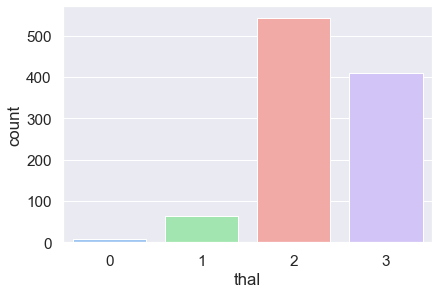

In [186]:
sns.countplot(data['thal'])
plt.tight_layout()

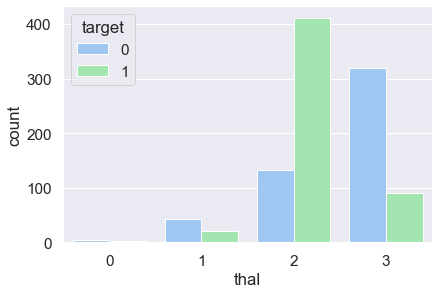

In [187]:
sns.countplot(data['thal'],hue=data["target"])
plt.tight_layout()

# Machine Learning


#### in data ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
#### thal = 0, also incorrect. They are also NaNs in the original dataset.
##### (read this on discussion of this datasets about dataset false values)

In [283]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value

In [284]:

X=data.drop(columns='target')
y=data['target']
print(X.shape)
print(y.shape)

(1000, 13)
(1000,)


In [285]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=23)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 13)
(300, 13)
(700,)
(300,)


In [286]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.8466666666666667

In [321]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc =format(metrics.accuracy_score(y_test, y_pred)*100,".2f")
# cf_matrix = confusion_matrix(y_test,y_pred)
# sns.heatmap(cf_matrix, annot=True)
print(f"Accuracy of our KNN model is: {acc}")

Accuracy of our KNN model is: 77.67


In [288]:

DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our KNN model is: {acc}")

Accuracy of our KNN model is: 98.66666666666667


In [309]:
models=[]
models.append(("SVC",SVC(probability=True)))
models.append(("KNN",KNeighborsClassifier(n_neighbors=4)))
models.append(("LR",LogisticRegression()))
models.append(("RT", RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)))
models.append(("DTC",DecisionTreeClassifier(random_state=0)))
models


[('SVC', SVC(probability=True)),
 ('KNN', KNeighborsClassifier(n_neighbors=4)),
 ('LR', LogisticRegression()),
 ('RT',
  RandomForestClassifier(max_leaf_nodes=20, min_samples_split=15,
                         n_estimators=1000, random_state=1)),
 ('DTC', DecisionTreeClassifier(random_state=0))]

In [336]:
names=[]
results=[]

In [356]:
def plot_conf_matrix(y_test,y_pred ,name):
       
    plt.figure(figsize=(5,5))
    cf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('True')

# Heat map with model accurancy


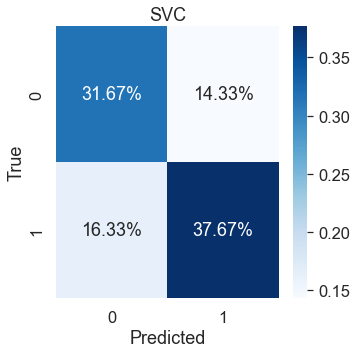

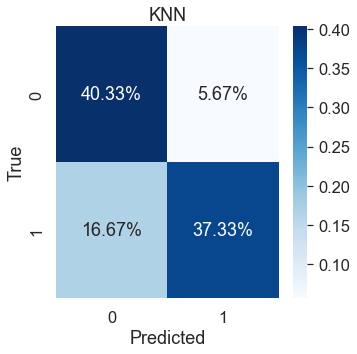

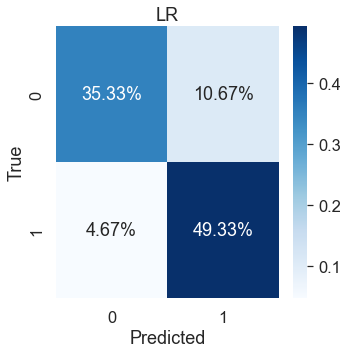

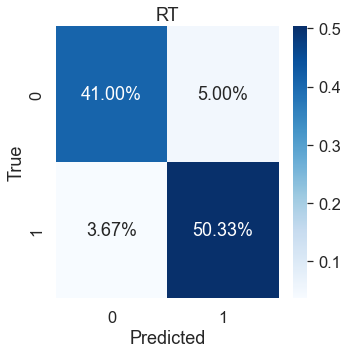

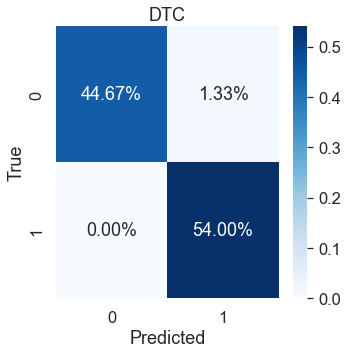

In [357]:
for name,model in models:
    names.append(name)
    obj=model
    obj.fit(X_train,y_train)
    y_pred=obj.predict(X_test)
    acc =format(metrics.accuracy_score(y_test, y_pred)*100,".2f")
    results.append(acc)
    plot_conf_matrix(y_test,y_pred,name)


## model Accuracy

Text(0.5, 1.0, 'Accuracy of All Models')

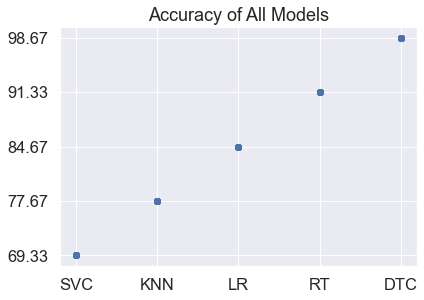

In [358]:
sns.set(font_scale=1.5)
plt.scatter(names,results)
plt.title('Accuracy of All Models')